# 1. Import

the following import statement gives you access to the following subpackages and modules:  
- features
    - feature 
- indices  
    - kbdi
    - ffdi
- utilities  
    - input_output
    - conversion
    - plotter

In [1]:
import datetime

from kbdiffdi import *

# 2. read input data and create the data structures

In this example, we assume the input data is in the form of a csv. In order for DROMOT to properly calculate the Keetch-Byram Drought Index (KBDI) and McArthur's Forest Fire Danger Index (FFDI), the input data must follow some conventions. For csvs, the data must be formatted as follows:  

|KNYSNA station | date | precipitation (mm) | temperature (C) | relative humidity (%) | wind speed (m/s)|  
|:-------------:|:----:|:------------------:|:---------------:|:---------------------:|:---------------:|  
||19970101|0|20.7|69|3.5|  
||19970102|0|20.4|60|1.3|  
||19970103|0.2|21|68|4|  
|| ... | ... | ... | ... | ... |  
|| ... | ... | ... | ... | ... |  
|| ... | ... | ... | ... | ... |  
||20171231|1.3|24.2|70|1.2|  
  
  
Date should be in the form yyyymmdd, preciptation data must be in millimeters, temperature in celsius, relative humidity in percent, and wind speed in meters per second.  

In [2]:
filename = "../data/Knysna.csv"
rain, temp, relhum, wind = input_output.load_csv(filename)

print("precipitation:")
print(rain)
print()
print("temperature:")
print(temp)

precipitation:
<class 'kbdi_ffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)

temperature:
<class 'kbdi_ffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


# 3. Instantiate a KBDI object, fit it to the data, and plot the output

kdbi:
<class 'kbdi_ffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


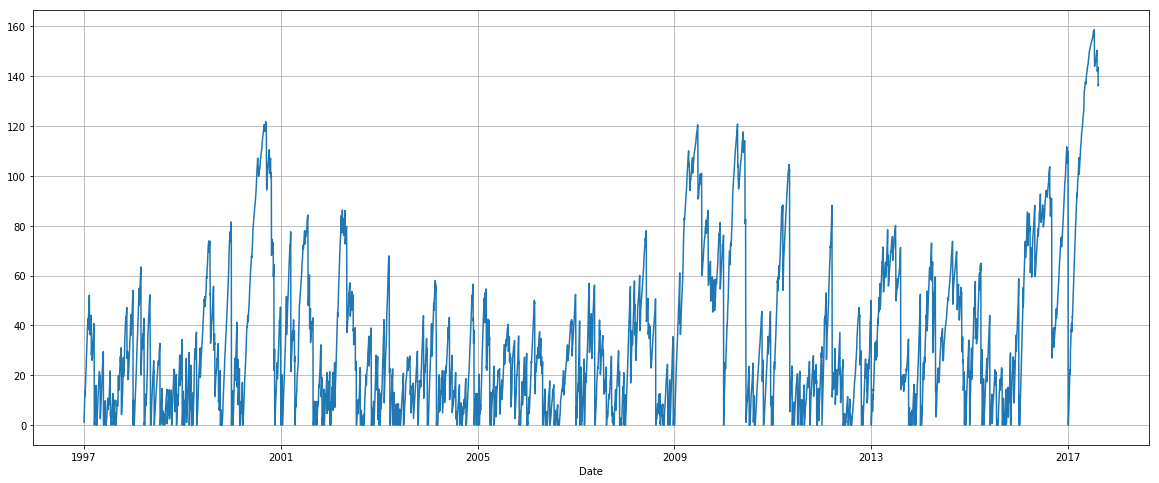

In [3]:
kbdi = indices.KBDI()
out = kbdi.fit(temp, rain)
print("kdbi:")
print(out)
plotter.timeseries(out)

# 4. Instantiate an FFDI object and fit it to the data

In [4]:
ffdi = indices.FFDI()
out_ffdi, out_df = ffdi.fit(out, rain, temp, wind, relhum)

# 5. Print output FFDI and DF objects and plot the output data

ffdi:
<class 'kbdi_ffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


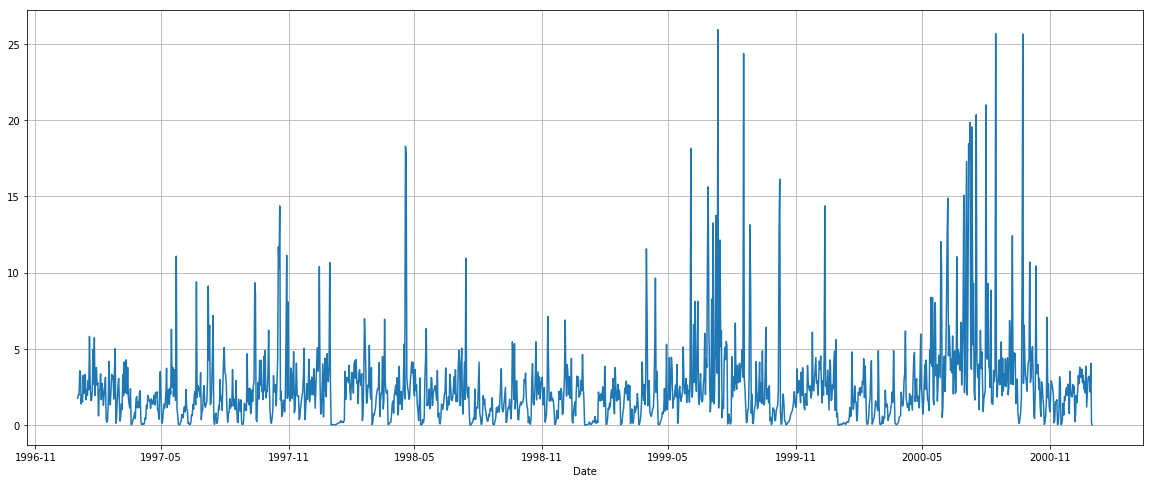


df:
<class 'kbdi_ffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


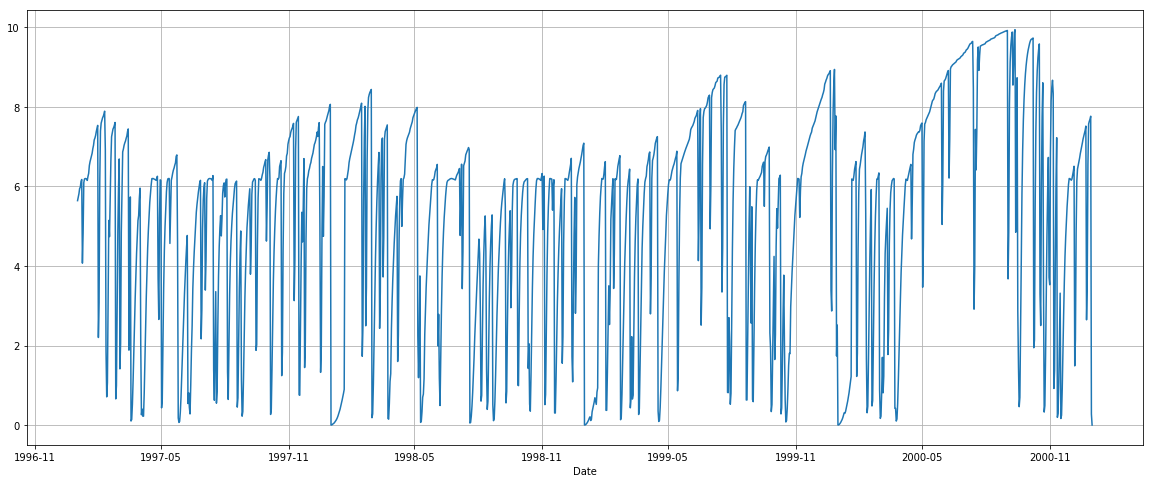

In [5]:
print("ffdi:")
print(out_ffdi)
plotter.timeseries(out_ffdi,None,datetime.datetime(2001,1,1))
print()
print("df:")
print(out_df)
plotter.timeseries(out_df,None,datetime.datetime(2001,1,1))